In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from analysis_tools.display import Display
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
from sklearn.datasets import load_iris

---
>## Advanced Scatterplot with `load_iris` dataset

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Text(0, 0.5, 'sepal width (cm)')

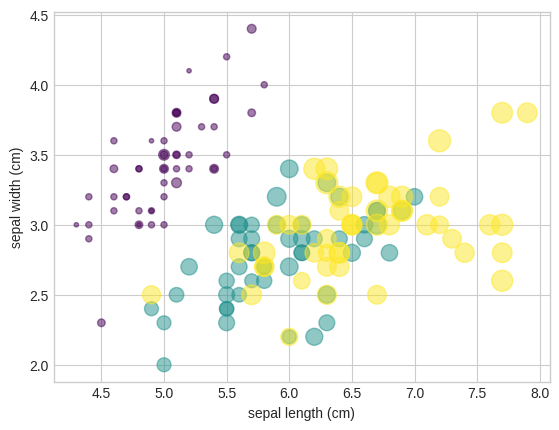

In [4]:
#'feature_names': ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
features = iris.data.T
plt.scatter(features[0], features[1], s = 100*features[3], c=iris.target, cmap='viridis', alpha=0.5) 
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

---
## <center> Error plots </center>

> #### Discrete Error plots

<ErrorbarContainer object of 3 artists>

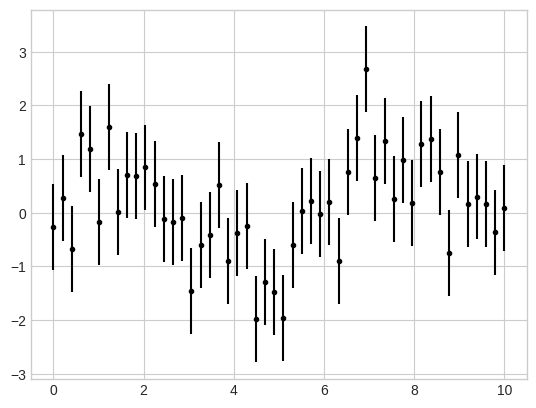

In [5]:
x = np.linspace(0,10, 50)
dy = 0.8
y = np.sin(x) + dy*np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k')

<ErrorbarContainer object of 3 artists>

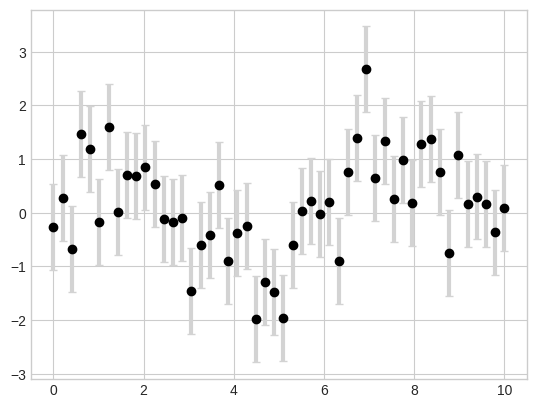

In [6]:
plt.errorbar(x,y, yerr=dy, color='k', ecolor= 'lightgray', elinewidth=3, capsize=3, fmt='o')

> #### Continuous Error plots

In [7]:
#Variables setup
from sklearn.gaussian_process import GaussianProcessRegressor
model = lambda x: x*np.sin(x)
xdata = np.array([1, 3, 5, 7, 8])
ydata = model(xdata)


In [8]:
#Compute the Gaussian Process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

GaussianProcessRegressor()

In [9]:
gp.predict?

Signature: gp.predict(X, return_std=False, return_cov=False)
Docstring:
Predict using the Gaussian process regression model.

We can also predict based on an unfitted model by using the GP prior.
In addition to the mean of the predictive distribution, optionally also
returns its standard deviation (`return_std=True`) or covariance
(`return_cov=True`). Note that at most one of the two can be requested.

Parameters
----------
X : array-like of shape (n_samples, n_features) or list of object
    Query points where the GP is evaluated.

return_std : bool, default=False
    If True, the standard-deviation of the predictive distribution at
    the query points is returned along with the mean.

return_cov : bool, default=False
    If True, the covariance of the joint predictive distribution at
    the query points is returned along with the mean.

Returns
-------
y_mean : ndarray of shape (n_samples,) or (n_samples, n_targets)
    Mean of predictive distribution at query points.

y_std : ndar

In [10]:
xfit = np.linspace(0,10,1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std = True)
                         

(0.0, 10.0)

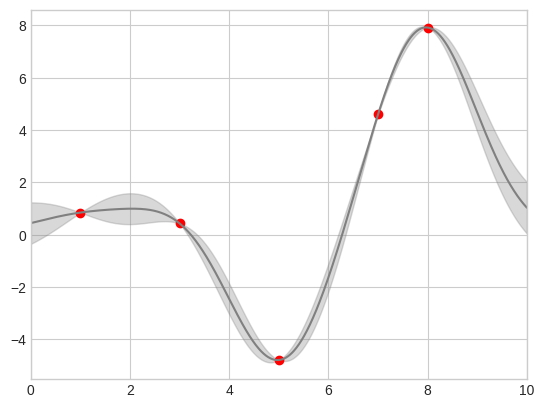

In [11]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, 'gray')
plt.fill_between(xfit, yfit+dyfit, yfit-dyfit, alpha=0.3, color='gray')
plt.xlim(0,10)

---
## <center> Density and Contour Plots <center>

In [12]:
plt.style.use('seaborn-v0_8-white')

In [13]:
#Variables setup
def z_model(x,y):
    return np.sin(x)**10 + np.cos(10+ y *x) * np.cos(x)
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)
X, Y = np.meshgrid(x,y)
Z = z_model(X,Y)

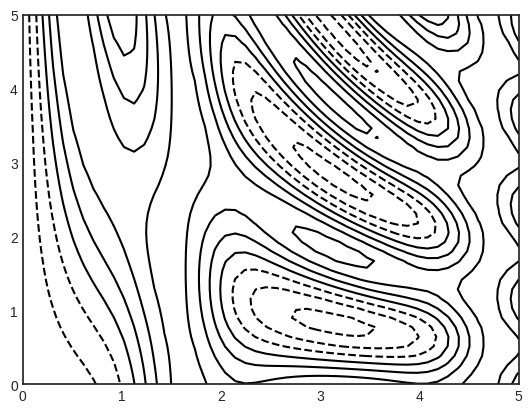

In [14]:
plt.contour(X,Y,Z,colors='black')

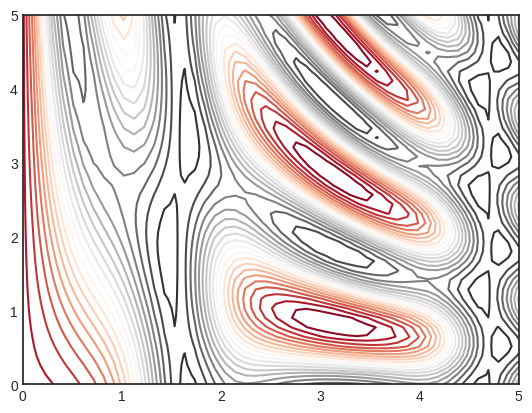

In [15]:
#plt.cm.<Tab> #Red–Gray colormap
#plt.contour?
plt.contour(X,Y,Z, 20, cmap='RdGy') 

> #### Contour Filled

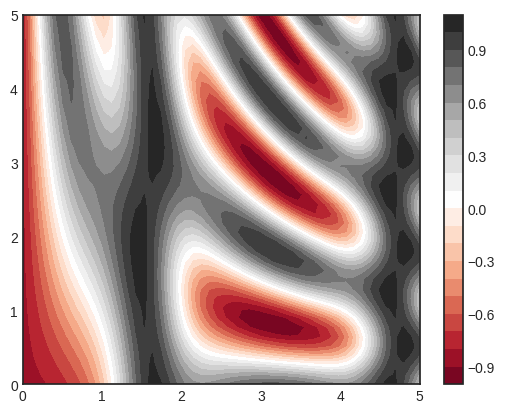

In [16]:
plt.contourf(X,Y,Z, 20, cmap='RdGy') 
plt.colorbar()

> #### CF with `plt.imshow` to smoothen contours

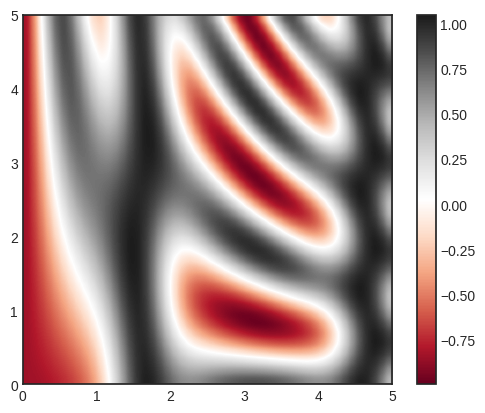

In [17]:
plt.imshow(Z, extent=[0,5,0,5],  origin='lower', cmap='RdGy', interpolation='gaussian', aspect='equal')
plt.colorbar();

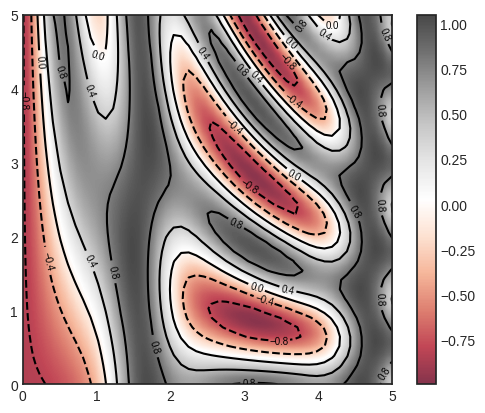

In [18]:
contours = plt.contour(X, Y, Z, 5, colors = 'black')
plt.clabel(contours, inline = True, fontsize= 7)
plt.imshow(Z, extent=[0, 5, 0, 5],  origin='lower', cmap='RdGy', interpolation='gaussian', aspect='equal', alpha=0.8)
plt.colorbar();

---
## <center> Histograms, Binnings, and Density </center>

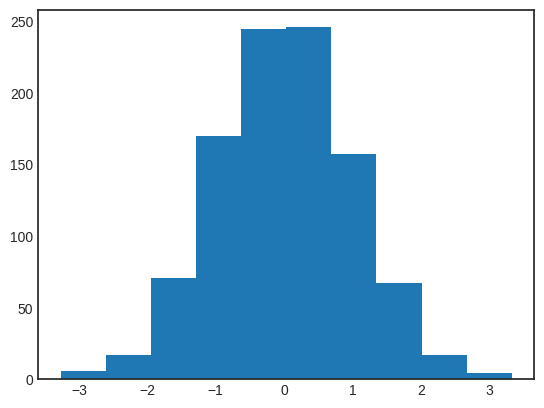

In [19]:
rng = np.random.default_rng(1701)
data = rng.normal(size = 1000)
plt.hist(data);


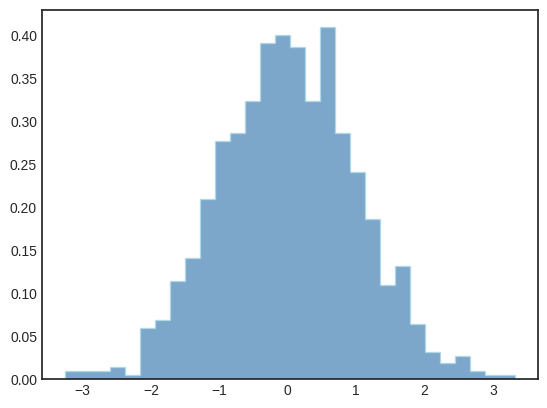

In [20]:
plt.hist(data, bins=30, density=True, color='steelblue', alpha = 0.7, histtype='stepfilled', edgecolor='lightblue', label="Histogram of 'data'");

>### Comparing Histograms of several distributions

(array([0.00749018, 0.        , 0.00249673, 0.00749018, 0.01498036,
        0.02247054, 0.04494108, 0.06491489, 0.06990834, 0.0848887 ,
        0.1323265 , 0.18226103, 0.15230031, 0.14730686, 0.19724139,
        0.20223484, 0.16728067, 0.22220865, 0.14730686, 0.15729377,
        0.13482323, 0.09737233, 0.07989525, 0.06241816, 0.02996072,
        0.03245744, 0.01747709, 0.00499345, 0.00249673, 0.00749018]),
 array([-3.18468906, -2.7841646 , -2.38364014, -1.98311569, -1.58259123,
        -1.18206677, -0.78154231, -0.38101786,  0.0195066 ,  0.42003106,
         0.82055552,  1.22107997,  1.62160443,  2.02212889,  2.42265335,
         2.8231778 ,  3.22370226,  3.62422672,  4.02475118,  4.42527563,
         4.82580009,  5.22632455,  5.62684901,  6.02737346,  6.42789792,
         6.82842238,  7.22894684,  7.62947129,  8.02999575,  8.43052021,
         8.83104467]),
 [<matplotlib.patches.Polygon at 0x7001a5aa4b90>])

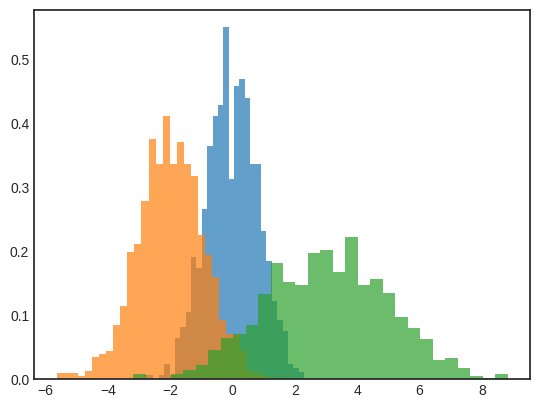

In [21]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.7, density=True, bins=30)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [22]:
# If you want to compute the histogram but dont want to display:
counts, bin_edges = np.histogram(data, bins=5)
counts, bin_edges 

(array([ 23, 241, 491, 224,  21]),
 array([-3.26668015, -1.94720849, -0.62773683,  0.69173484,  2.0112065 ,
         3.33067816]))

>### Two-Dimensional Histograms and Binnings

In [37]:
mean = [0,0]
cov = [[1,1], [1,2]]
x, y = rng.multivariate_normal(mean,cov,10000).T

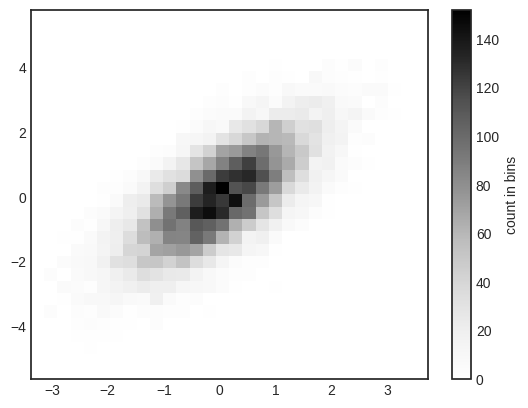

In [38]:
plt.hist2d(x, y, bins=30)
plt.colorbar(label="count in bins")

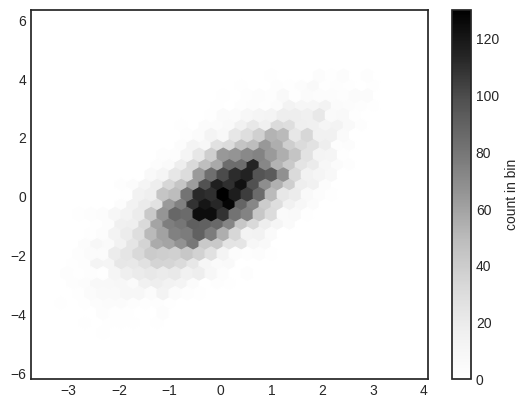

In [39]:
plt.hexbin(x,y,gridsize=30)
plt.colorbar(label='count in bin')

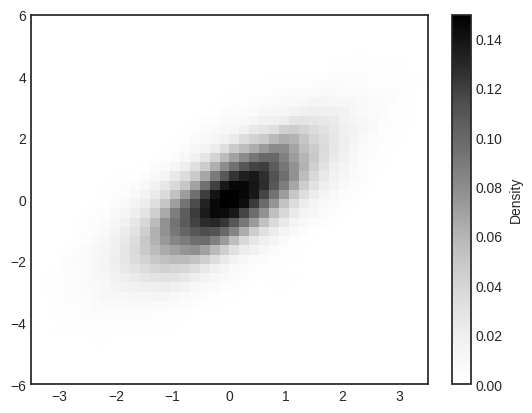

In [45]:
from scipy.stats import gaussian_kde 
# fit an array of size [Ndim, Nsamples]
data = np.vstack([x,y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

#  plot the results as an image
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6])
plt.colorbar(label='Density')                
